# Vader Sentiment Analysis
This notebook takes you through doing sentiment analysis of tweets and producing a bar graph displaying your results at the end.

For more information about how Vader works behind the scenes see here: https://github.com/cjhutto/vaderSentiment

###  Before we begin
Before we start, you will need to have set up a [Carbonate account](https://kb.iu.edu/d/aolp) in order to access [Research Desktop (ReD)](https://kb.iu.edu/d/apum). You will also need to have access to ReD through the [thinlinc client](https://kb.iu.edu/d/aput). If you have not done any of this, or have only done some of this, but not all, you should go to our [textPrep-Py.ipynb](https://github.com/cyberdh/Text-Analysis/blob/master/Intro/Python/Py_notebooks/textPrep-Py.ipynb) before you proceed further. The textPrep-Py notebook provides information and resources on how to get a Carbonate account, how to set up ReD, and how to get started using the Jupyter Notebook on ReD.   

### Run CyberDH environment
The code in the cell below points to a Python environment specificaly for use with the Python Jupyter Notebooks created by Cyberinfrastructure for Digital Humanities. It allows for the use of the different packages in our notebooks and their subsequent data sets.

##### Packages
- **sys:** Provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter. It is always available.
- **os:** Provides a portable way of using operating system dependent functionality.

#### NOTE: This cell is only for use with Research Desktop. You will get an error if you try to run this cell on your personal device!!

In [2]:
import sys
import os
sys.path.insert(0,"/N/u/cyberdh/Carbonate/dhPyEnviron/lib/python3.6/site-packages")
os.environ["NLTK_DATA"] = "/N/u/cyberdh/Carbonate/dhPyEnviron/nltk_data"

### Include necessary packages for notebook 

Python's extensibility comes in large part from packages. Packages are groups of functions, data, and algorithms that allow users to easily carry out processes without recreating the wheel. Some packages are included in the basic installation of Python, others created by Python users are available for download.

In your terminal, packages can be installed by simply typing `pip install nameofpackage --user`. However, since you are using ReD and our Python environment, you will not need to install any of the packages below to use this notebook. Anytime you need to make use of a package, however, you need to import it so that Python knows to look in these packages for any functions or commands you use. Below is a brief description of the packages we are using in this notebook:     

- **nltk:** Platform for building Python programs to work with human language data. Here we bring in the VADER sentiment analysis tool which is now a part of the nltk package.

- **pandas:** An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **numpy:** The fundamental package for scientific computing with Python.

- **os:** This module provides a portable way of using operating system dependent functionality.

- **csv:** Implements classes to read and write tabular data in CSV format.

- **json:** Used to parse and manipulate data in JSON format.

- **glob:** Finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order.

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import os
import csv
import json
import glob

In [25]:
source = "*"
fileType = ".json"
tweets = []

Here we save the two file paths we will need throughout this notebook. This way we only need to make changes here and they will be implemeneted throughout the code. Change these to match where your data can be found (dataHome) and where you want any output such as .csv files or images to be saved (dataResults).

In [26]:
homePath = os.environ['HOME']
dataHome = os.path.join(homePath, "Text-Analysis-master","data","twitter")
dataResults = os.path.join(homePath,"Text-Analysis-master","Output")

#### Shorten SentimentIntensityAnalyzer Function

We shorten the SentimentIntensityAnalyzer() to just 'vader' (minus the quotes).

In [27]:
vader = SentimentIntensityAnalyzer()

#### Read the 'text' key in JSON data.

Here we read in our twitter data which is in JSON format. The only lines you will need to change are the file path after csvRoot so that it matches where you have your data stored, and the folder name after "if d == 'Results'" This telling the program to ignore this folder because it contains other data. This contains the folder storing our results that this code outputs, so we don't want to read in any files in this folder so we tell it to 'continue' on past the 'Results' folder. If you have a folder with a different name that needs to be ignored, simply replace 'Results' with the name of your folder.

In [28]:
if fileType == ".json":
    for filename in glob.glob(os.path.join(dataHome, "JSON", source+fileType)):
        with open(filename, encoding = 'utf-8') as json_data:
            for line in json_data:
                data = json.loads(line)
                tweets.append(data['text'])

In [29]:
if fileType == ".csv":
    all_files = glob.glob(os.path.join(dataHome, "CSV", "parkland",source + fileType))     
    df_all = (pd.read_csv(f, encoding = 'ISO-8859-1') for f in all_files)
    cc_df = pd.concat(df_all, ignore_index=True)
    cc_df = pd.DataFrame(cc_df, dtype = 'str')
    tweets = cc_df['text'].values.tolist()

In [30]:
rtDF = pd.DataFrame(tweets)
print(rtDF[:10])

                                                   0
0  RT @WayneDupreeShow: This is what I am hearing...
1  RT @W7VOA: US House has adjourned, making a #G...
2  RT @W7VOA: US House has adjourned, making a #G...
3  RT @SW_SWF: "Expect to see this nonsense after...
4  RT @DrMartyFox: #FakeTears Schumer\n\n"Pelosi,...
5  PLOT TWIST: It's the President. #GovernmentShu...
6  RT @WayneDupreeShow: This is what I am hearing...
7  NEVER FORGET   #Trump: "PROUD TO SHUT DOWN GOV...
8  Check out @NBCNews &amp; #Congress comments al...
9  RT @W7VOA: US House has adjourned, making a #G...


#### Create labels for different sentiment values and start the count for each value at zero
Here we create the labels for our different sentiment values by creating a dictionary. Our sentiment scores can be anywhere from -1 to 1 with -1 having a very negative sentiment and 1 having a very positive sentiment.

In [31]:
res = {"-1":0, "-.9":0, "-.8":0, "-.7":0, "-.6":0, "-.5":0, "-.4":0, "-.3":0, "-.2":0, "-.1":0, "0":0, ".1":0, ".2":0,".3":0, ".4":0, ".5":0, ".6":0, ".7":0, ".8":0, ".9":0, "1":0}

Here we create variables we will add to later. The total gives us the compound score for the tweets, numberOfTweets simply counts the number of tweets we have, totalSquared gives us the total compound score squared, and scores gives us a list with a compund score for each tweet.

In [32]:
total = 0
numberOfTweets = 0
totalSquared = 0
scores = []

#### Go through and apply the Vader sentiment analyzer to all tweets and count them

Here we apply VADER to our tweets and start adding the results to the res dictionary as well as the total, numberOfTweets, totalSquared, and scores variables. No changes should be needed here.

In [33]:
for index, row in rtDF.iterrows():
    vs = vader.polarity_scores(str(rtDF.iloc[:,0][index]))
    scores.append(vs['compound'])
    total += vs["compound"]
    numberOfTweets += 1
    totalSquared += vs["compound"]**2
    if vs["compound"]==0.0:
        res["0"] +=1
    elif 0 < vs["compound"] <= 0.1:
        res[".1"] +=1
    elif 0.1 <= vs["compound"] <= 0.2:
        res[".2"] +=1
    elif 0.2 < vs["compound"] <= 0.3:
        res[".3"] +=1
    elif 0.3 < vs["compound"] <= 0.4:
        res[".4"] +=1
    elif 0.4 < vs["compound"] <= 0.5:
        res[".5"] +=1
    elif 0.5 < vs["compound"] <= 0.6:
        res[".6"] +=1
    elif 0.6 < vs["compound"] <= 0.7:
        res[".7"] +=1
    elif 0.7 < vs["compound"] <= 0.8:
        res[".8"] +=1
    elif 0.8 < vs["compound"] <= 0.9:
        res[".9"] +=1
    elif 0.9 < vs["compound"] <= 1:
        res["1"] +=1
    elif 0 > vs["compound"] >= -0.1:
        res["-.1"] +=1
    elif -0.1 > vs["compound"] >= -0.2:
        res["-.2"] +=1
    elif -0.2 > vs["compound"] >= -0.3:
        res["-.3"] +=1
    elif -0.3 > vs["compound"] >= -0.4:
        res["-.4"] +=1
    elif -0.4 > vs["compound"] >= -0.5:
        res["-.5"] +=1
    elif -0.5 > vs["compound"] >= -0.6:
        res["-.6"] +=1
    elif -0.6 > vs["compound"] >= -0.7:
        res["-.7"] +=1
    elif -0.7 > vs["compound"] >= -0.8:
        res["-.8"] +=1
    elif -0.8 > vs["compound"] >= -0.9:
        res["-.9"] +=1
    elif -0.9 > vs["compound"] >= -1:
        res["-1"] +=1

print(res)



{'-1': 31, '-.9': 158, '-.8': 240, '-.7': 359, '-.6': 761, '-.5': 1001, '-.4': 4830, '-.3': 1031, '-.2': 1012, '-.1': 309, '0': 11311, '.1': 412, '.2': 370, '.3': 588, '.4': 1287, '.5': 1282, '.6': 842, '.7': 730, '.8': 325, '.9': 164, '1': 14}


Now we import the math package and use it to calcualte the mean and the standard deviation of our sentiment scores.

In [34]:
import math
mean = total / numberOfTweets
std = math.sqrt(totalSquared / numberOfTweets) - mean**2

Here we save the results of the mean, standard deviation, and total number of tweets as a text file. The only changes you will need to make are to the file path in the first line. This is the path pointing to where you would like to save your .txt file.

In [35]:
with open(os.path.join(dataResults, 'VADERCombinedRawData.txt'), 'w') as write_file:
    write_file.write(str(res))
    write_file.write("\nMean: " + str(mean))
    write_file.write("\nStandard Deviation: " + str(std))
    write_file.write("\nNumber of Tweets: " +str(numberOfTweets))

#### Plot the results in a bar graph

This plots the results as a bar graph. It also places a line marking where 0 is and another dotted line marking the mean score. The mean, standard deviation, and number of tweets are also included in the title. The percentage scores above each bar are what percent of the total number of tweets have a score that is within the range represented by that bar. 

The only lines you will most likely need to change are the plot title which is the phrase in quotes after fig.set_title and then the file path after plt.savefig. Change the file path to the location where you would like the .png file of the bar graph to be saved.

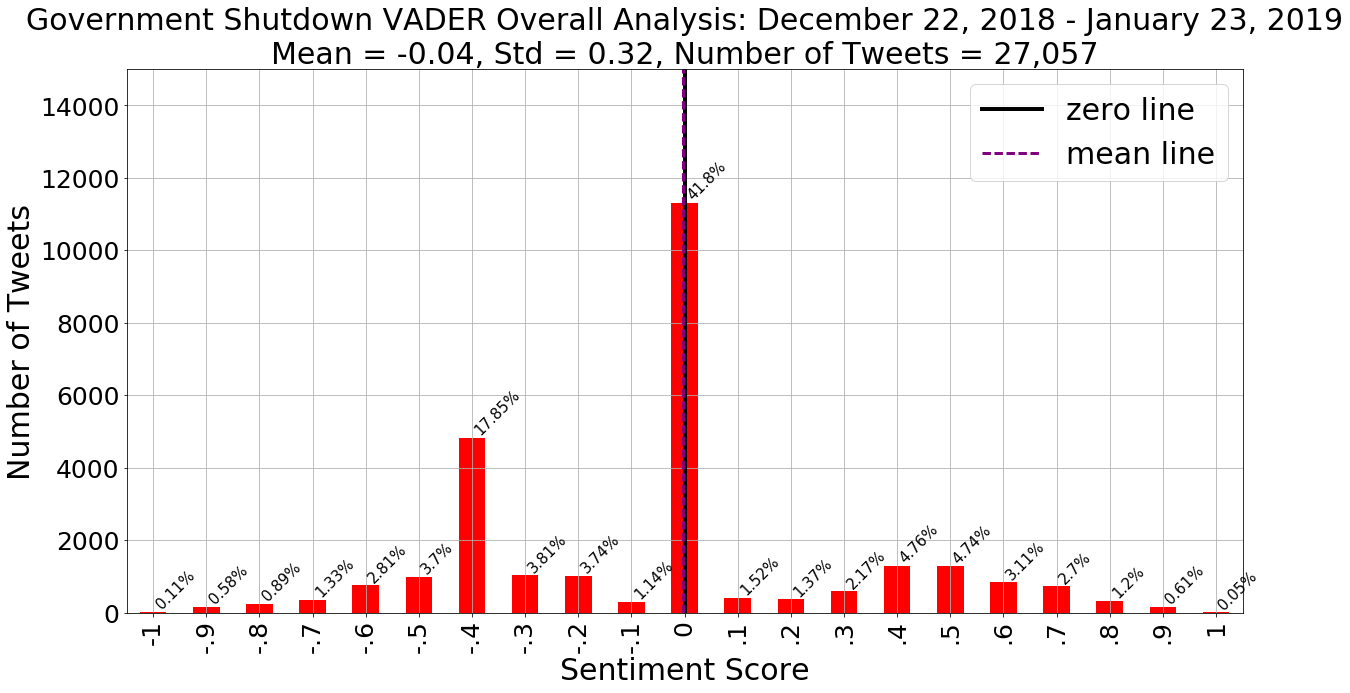

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
    
%matplotlib inline
cres = Counter(res)
resdf = pd.DataFrame.from_dict(cres, orient='index').reset_index()
resdf = resdf.rename(columns={'index':'score', 0:'count'})
total = resdf['count'].sum()

#print(resdf)


fig = resdf.plot(x=resdf['score'],kind='bar', align = 'center', color =['red'], grid = True, legend = None, figsize=(20,10))
fig.set_ylabel('Number of Tweets', fontsize = 30)
fig.set_xlabel('Sentiment Score', fontsize = 30)
fig.set_title('Government Shutdown VADER Overall Analysis: December 22, 2018 - January 23, 2019\n'
              + 'Mean = {0:.2f}'.format(mean) + ', ' + 'Std = {0:.2f}'.format(std) +', ' + "Number of Tweets = {:,}".format(numberOfTweets),
             fontsize = 30)
fig.set_ylim(0,15000)

rects = fig.patches

# vertical line for 0
zeroLine = plt.axvline(x = 10, color = 'black', linewidth = 4)

# vertical line for mean
meanLine = plt.axvline(x = mean+10, color = 'purple', linestyle = 'dashed', linewidth = 3)

plt.legend((zeroLine, meanLine), ['zero line', 'mean line'], prop={'size' : 30}, loc = 'upper right')

# Now make some labels

plt.tick_params(axis = 'both', which = 'major', labelsize = 25)

labels =round((resdf['count']/total) * 100, 2).astype(str)+'%'

for rect, label in zip(rects, labels):
    height = rect.get_height()
    fig.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='left', fontsize = 15, va='bottom', rotation = 45)
    
#plt.rcParams['font.sans-serif'] = "Arial"
#plt.rcParams["font.family"] = "sans-serif"
#plt.axvline(x = mean + 12.5, color ='green', linestyle = '--')
plt.savefig(os.path.join(dataResults,'vaderGovShutdownBarGraph.png'), format='png', dpi=300, bbox_inches='tight')


plt.show()


Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

## VOILA!!